In [ ]:
# Data Preprocessing
import pandas as pd
import numpy as np
import timeit
from sklearn.preprocessing import StandardScaler #normalisasi z-score
from sklearn.decomposition import PCA
# Data VizualizationS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# DataFrame
data = pd.read_excel("data_penelitian.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nip                     3655 non-null   int64 
 1   usia                    3655 non-null   int64 
 2   jenis_kelamin           3655 non-null   object
 3   masa_kerja              3655 non-null   int64 
 4   satuan_kerja            3655 non-null   object
 5   unit_satuan             3655 non-null   object
 6   ketersediaan_sistem     3655 non-null   int64 
 7   kemampuan_sistem        3655 non-null   int64 
 8   kemudahan_penggunaan    3655 non-null   int64 
 9   kemudahan_fasilitas     3655 non-null   int64 
 10  tingkat_pelayanan       3655 non-null   int64 
 11  ketersediaan_bantuan    3655 non-null   int64 
 12  kualitas_materi         3655 non-null   int64 
 13  kualitas_kuis           3655 non-null   int64 
 14  kualitas_video          3655 non-null   int64 
 15  kual

In [ ]:
# Cek duplikasi data
cekduplikasi1 = data.duplicated(subset=["nip"])
cekduplikasi1.value_counts()

False    3619
True       36
Name: count, dtype: int64

In [ ]:
# Menghapus duplikasi data
data = data.drop_duplicates(subset="nip")

In [ ]:
# Cek hasil penanganan duplikasi
cekduplikasi2 = data.duplicated(subset=["nip"])
cekduplikasi2.value_counts()

False    3619
Name: count, dtype: int64

In [ ]:
# Cek missing value
print(data.isnull().sum())
print()
print(data.describe())

nip                       0
usia                      0
jenis_kelamin             0
masa_kerja                0
satuan_kerja              0
unit_satuan               0
ketersediaan_sistem       0
kemampuan_sistem          0
kemudahan_penggunaan      0
kemudahan_fasilitas       0
tingkat_pelayanan         0
ketersediaan_bantuan      0
kualitas_materi           0
kualitas_kuis             0
kualitas_video            0
kualitas_gambartulisan    0
konsistensi_informasi     0
dtype: int64

                nip         usia   masa_kerja  ketersediaan_sistem  \
count  3.619000e+03  3619.000000  3619.000000          3619.000000   
mean   1.985038e+17    38.029014    15.003868             4.634982   
std    8.487507e+14     8.488309     8.015945             0.586095   
min    1.960122e+17    22.000000     1.000000             1.000000   
25%    1.980072e+17    32.000000     9.000000             4.000000   
50%    1.987032e+17    36.000000    14.000000             5.000000   
75%    1.991073e+17 

In [ ]:
# Select attribute
data = data[["usia","jenis_kelamin","masa_kerja","ketersediaan_sistem",
             "kemampuan_sistem","kemudahan_penggunaan","kemudahan_fasilitas",
             "tingkat_pelayanan","ketersediaan_bantuan","kualitas_materi",
             "kualitas_kuis","kualitas_video","kualitas_gambartulisan",
             "konsistensi_informasi"]]

In [ ]:
# Encode 'jenis_kelamin'
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-laki':1, 'Perempuan':2})

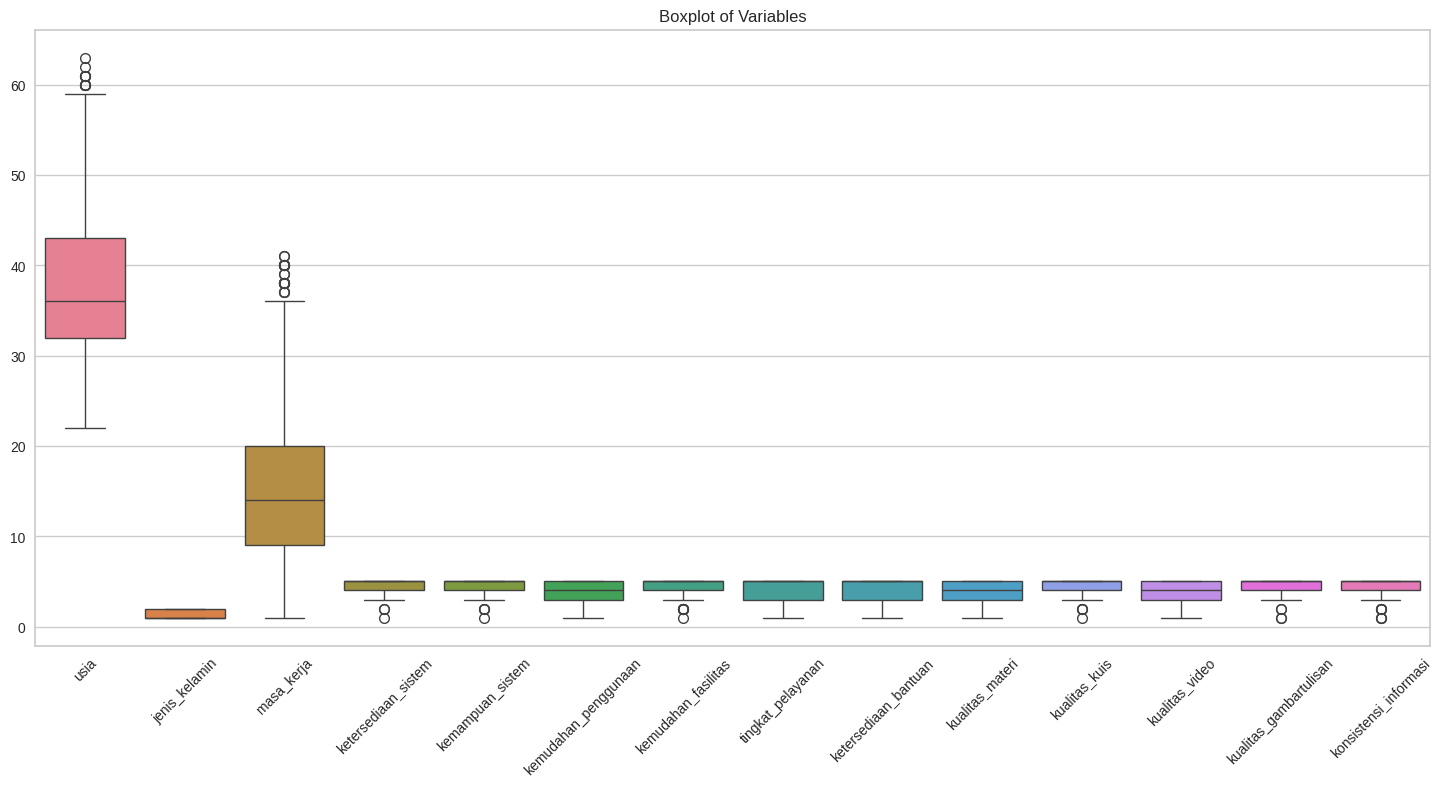

In [ ]:
# Cek outlier setiap atribut
plt.figure(figsize=(18, 8))
sns.boxplot(data=data)
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)  #rotasi label
plt.show()

In [ ]:
# Outliers function untuk mengubah outlier dengan nilai tertinggi dan terendah non-outlier
def handle_outliers(data):
    data_handled = data.copy()
    for column in ['usia', 'masa_kerja', 'ketersediaan_sistem', 'kemampuan_sistem',
                   'kemudahan_fasilitas', 'kualitas_kuis', 'kualitas_gambartulisan',
                   'konsistensi_informasi']:
        q1 = data_handled[column].quantile(0.25)
        q3 = data_handled[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data_handled[column] = np.where(data_handled[column] < lower_bound, lower_bound,
                                        np.where(data_handled[column] > upper_bound, upper_bound,
                                                 data_handled[column]))
    return data_handled

# Handle outlier
data_handled = handle_outliers(data)

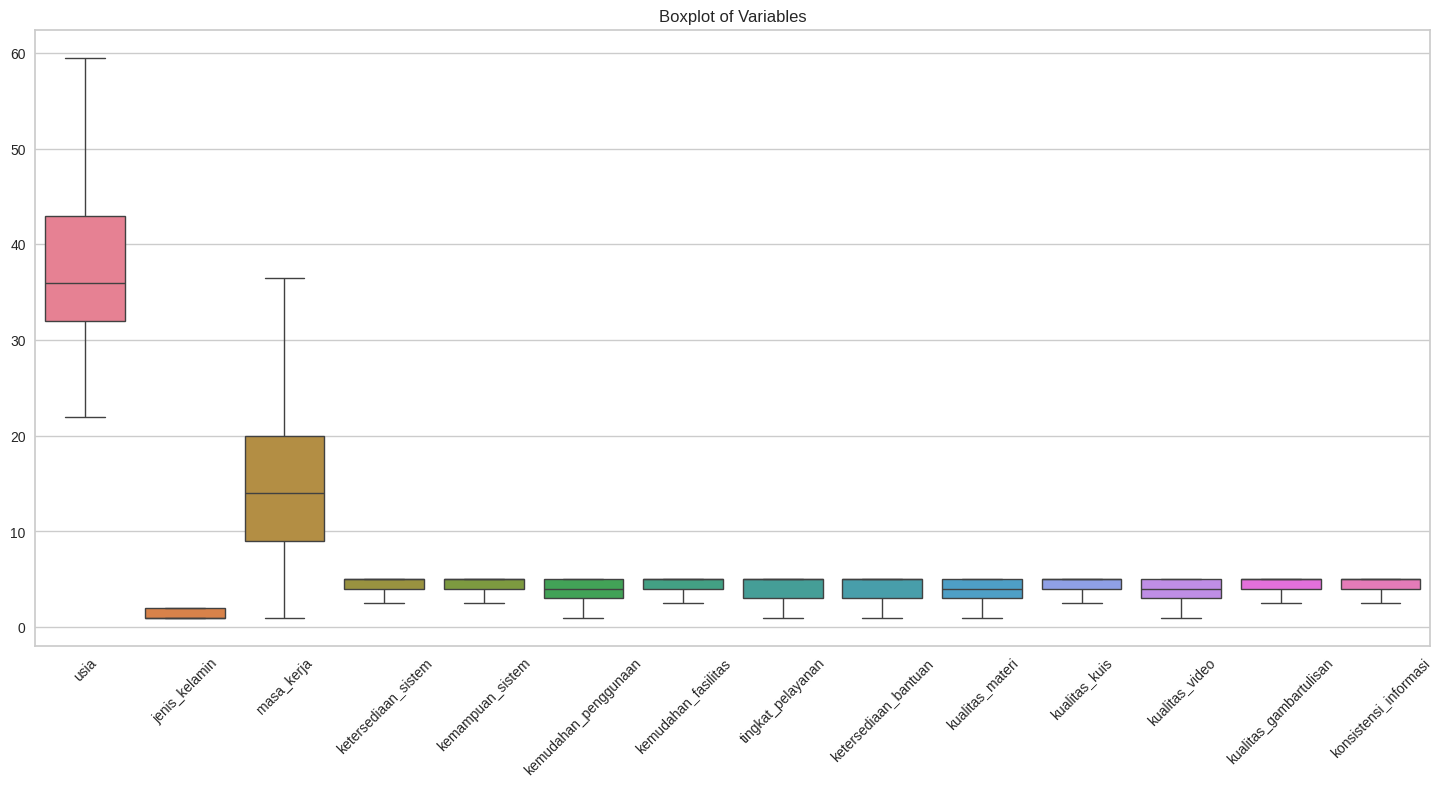

In [ ]:
# Visualisasi hasil penanganan outlier
plt.figure(figsize=(18, 8))
sns.boxplot(data=data_handled)
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)  #rotasi label
plt.show()

In [ ]:
# Normalisasi Z-Score
# Pemilihan fitur untuk Normalisasi
columns_to_normalize = ["usia","jenis_kelamin", "masa_kerja",
                        "ketersediaan_sistem", "kemampuan_sistem",
                        "kemudahan_penggunaan", "kemudahan_fasilitas",
                        "tingkat_pelayanan", "ketersediaan_bantuan",
                        "kualitas_materi", "kualitas_kuis",
                        "kualitas_video", "kualitas_gambartulisan",
                        "konsistensi_informasi"]

X = data_handled[columns_to_normalize]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kembalikan hasil normalisasi ke DataFrame
data_normalized = pd.DataFrame(X_scaled, columns=columns_to_normalize)
data_normalized['z_score'] = data_normalized.mean(axis=1)

data_normalized.head(10)

,usia,jenis_kelamin,masa_kerja,ketersediaan_sistem,kemampuan_sistem,kemudahan_penggunaan,kemudahan_fasilitas,tingkat_pelayanan,ketersediaan_bantuan,kualitas_materi,kualitas_kuis,kualitas_video,kualitas_gambartulisan,konsistensi_informasi,z_score
0,2.533467,-0.742891,2.700359,0.625089,0.598468,-2.682105,0.650100,-1.719937,-0.981151,-2.222724,0.706756,-2.130682,0.740807,0.681139,-0.088807
1,2.533467,-0.742891,2.700359,0.625089,0.598468,-0.884764,0.650100,-0.907664,-0.981151,-0.706554,0.706756,-0.671659,0.740807,0.681139,0.310107
2,2.533467,-0.742891,2.637597,-1.090647,0.598468,-1.783435,-1.200244,-1.719937,-1.833885,-2.222724,-3.057410,-2.130682,-1.079275,-1.157759,-0.874954
3,2.533467,1.346093,2.700359,0.625089,-1.342262,-1.783435,0.650100,-1.719937,-1.833885,-2.222724,0.706756,-2.130682,0.740807,-2.996657,-0.337636
4,2.533467,1.346093,2.700359,0.625089,-1.342262,-1.783435,0.650100,-0.907664,-1.833885,-2.222724,-3.057410,-2.130682,-2.899358,-2.996657,-0.808498
5,2.533467,-0.742891,2.700359,0.625089,0.598468,-1.783435,0.650100,-0.907664,-0.981151,-1.464639,0.706756,-1.401170,0.740807,0.681139,0.139660
6,2.533467,1.346093,2.700359,0.625089,0.598468,-1.783435,0.650100,-1.719937,-1.833885,-2.222724,0.706756,-2.130682,0.740807,0.681139,0.063687
7,2.533467,1.346093,2.637597,0.625089,0.598468,-2.682105,0.650100,-1.719937,-0.981151,-2.222724,0.706756,-2.130682,0.740807,0.681139,0.055923
8,2.533467,-0.742891,2.135505,0.625089,0.598468,-2.682105,0.650100,-1.719937,-0.981151,-2.222724,0.706756,-2.130682,0.740807,0.681139,-0.129154
9,2.533467,1.346093,2.009982,0.625089,0.598468,-2.682105,0.650100,-1.719937,-0.981151,-2.222724,-1.175327,-2.130682,-1.079275,-1.157759,-0.384697


In [ ]:
# PCA

def dimension_reduction_pca(data_handled):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_handled)

    #Penerapan PCA
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data_scaled)

    # Print ratio PCA
    print("Explained variance ratio:", pca.explained_variance_ratio_)

    #Buat DF untuk pengurangan dimensi
    data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(data_pca.shape[1])])

    return data_pca_df

# function untuk mengurangi dimensi data
reduced_data_handled = dimension_reduction_pca(data_handled)

# Print DataFrame yang telah tertransformasi
print(reduced_data_handled.head())

Explained variance ratio: [0.43453906 0.22951422 0.08439259]
        PC1       PC2       PC3
0  3.750610 -4.511734 -0.757269
1  1.807879 -3.591518 -1.850482
2  6.151633 -0.869966 -1.260059
3  4.886571 -2.424954  0.032096
4  6.273881  0.389643 -0.273029


In [ ]:
# PCA

def dimension_reduction_pca(data_normalized):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_normalized)

    #Penerapan PCA
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data_scaled)

    # Print ratio PCA
    print("Explained variance ratio:", pca.explained_variance_ratio_)

    #Buat DF untuk pengurangan dimensi
    data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(data_pca.shape[1])])

    return data_pca_df

# function untuk mengurangi dimensi data
reduced_data_normalized = dimension_reduction_pca(data_normalized)

# Print DataFrame yang telah tertransformasi
print(reduced_data_normalized.head())

Explained variance ratio: [0.45986869 0.22234004 0.07993319]
        PC1       PC2       PC3
0  3.249875 -4.891151 -0.761622
1  1.213898 -3.882777 -1.912212
2  6.249958 -1.415688 -1.382577
3  4.598073 -2.946390 -0.224985
4  6.385322 -0.244808 -0.641231


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

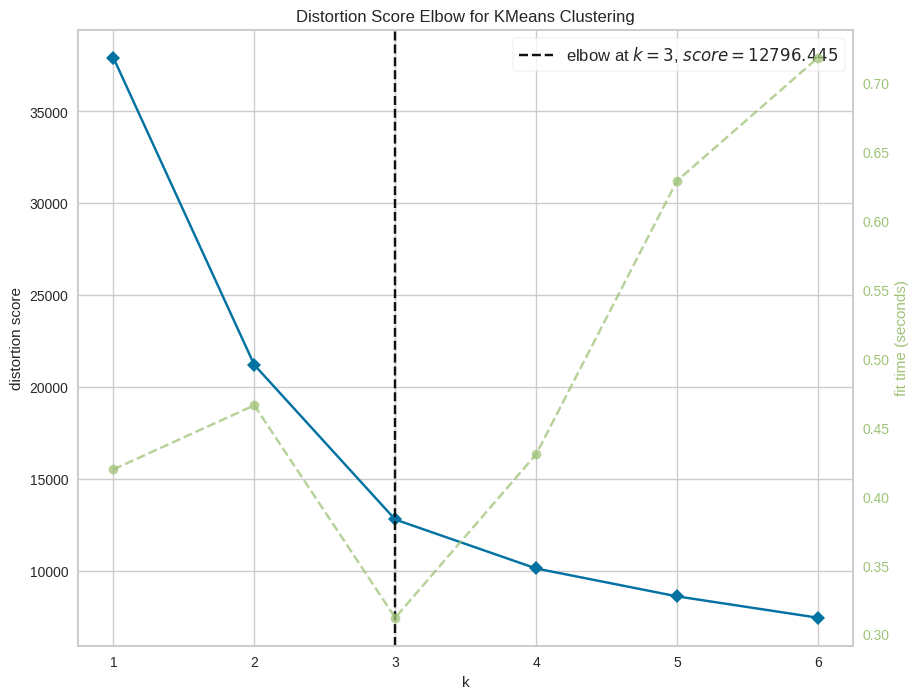

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,7), size=(1000,800))

visualizer.fit(reduced_data_handled)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

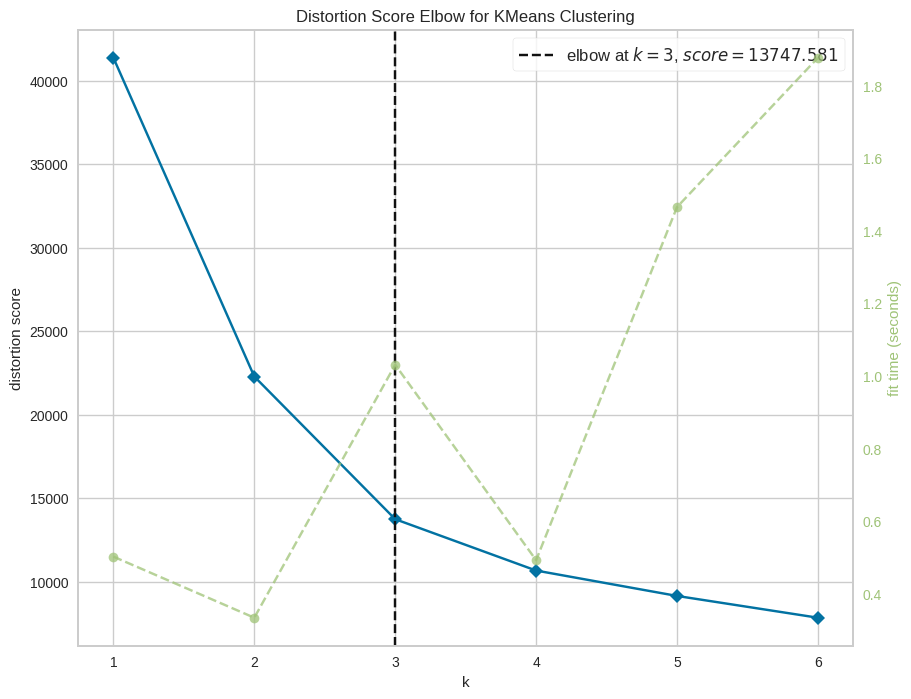

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,7), size=(1000,800))

visualizer.fit(reduced_data_normalized)
visualizer.show()

In [ ]:
# Catat waktu mulai
start1 = timeit.default_timer()

# Penerapan K-Means clustering
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(reduced_data_normalized)
y_kmeans = kmeans.fit_predict(reduced_data_normalized)

# Hitung waktu komputasi KMeans
stop1 = timeit.default_timer()
# Time execution
waktu_komputasi1 = stop1 - start1
print(waktu_komputasi1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9457607980000375


In [ ]:
# Simpan prediksi cluster KMeans sebagai atribut
reduced_data_normalized['y_kmeans']=y_kmeans
#Cek jumlah data pada setiap cluster terbentuk
print(reduced_data_normalized['y_kmeans'].value_counts)
print(reduced_data_normalized['y_kmeans'].value_counts())

# Save to Excel
reduced_data_normalized.to_excel("kmeans_result.xlsx", index=False)

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       2
3       2
4       2
       ..
3614    1
3615    0
3616    0
3617    0
3618    1
Name: y_kmeans, Length: 3619, dtype: int32>
y_kmeans
0    1873
1     937
2     809
Name: count, dtype: int64


In [ ]:
# Catat waktu mulai
start2 = timeit.default_timer()

# Penerapan K-Means++ clustering
kmeansplus = KMeans(init='k-means++',n_clusters=3,random_state=42)
# Membuat prediksi
y_kmeansplus = kmeansplus.fit_predict(reduced_data_normalized)

# Hitung waktu komputasi KMeans++
stop2 = timeit.default_timer()
# Time execution
waktu_komputasi2 = stop2 - start2
print(waktu_komputasi2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.41696724899998117


In [ ]:
# Simpan prediksi cluster KMeans++ sebagai atribut
reduced_data_normalized['y_kmeansplus']=y_kmeansplus
#Cek jumlah data pada setiap cluster terbentuk
print(reduced_data_normalized['y_kmeansplus'].value_counts)
print(reduced_data_normalized['y_kmeansplus'].value_counts())

# Save to Excel
data.to_excel("kmeansplus_result.xlsx", index=False)

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       2
3       2
4       2
       ..
3614    0
3615    1
3616    1
3617    1
3618    0
Name: y_kmeansplus, Length: 3619, dtype: int32>
y_kmeansplus
1    1873
0     937
2     809
Name: count, dtype: int64


In [ ]:
# Performa KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_data_normalized)
kmeans_labels = kmeans.labels_
kmeans_silhouette_score = silhouette_score(reduced_data_normalized, kmeans_labels)
print("Silhouette Score untuk KMeans:", kmeans_silhouette_score)
print('Jumlah Iterasi K-Means= ',getattr(kmeans,'n_iter_'))
print("Durasi Komputasi K-Means= ",waktu_komputasi1,"Detik")

# Performa KMeans++ clustering
kmeans_plus = KMeans(init='k-means++', n_clusters=3, random_state=42)
kmeans_plus.fit(reduced_data_normalized)
kmeans_plus_labels = kmeans_plus.labels_
kmeans_plus_silhouette_score = silhouette_score(reduced_data_normalized, kmeans_plus_labels)
print("Silhouette Score untuk KMeans++:", kmeans_plus_silhouette_score)
print('Jumlah Iterasi K-Means++= ',getattr(kmeansplus,'n_iter_'))
print("Durasi Komputasi K-Means++ = ",waktu_komputasi2,"Detik")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans: 0.5323783734026949
Jumlah Iterasi K-Means=  3
Durasi Komputasi K-Means=  0.9457607980000375 Detik


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans++: 0.5323783734026949
Jumlah Iterasi K-Means++=  3
Durasi Komputasi K-Means++ =  0.41696724899998117 Detik


In [ ]:
# Cek hasil cluster yang dihasilkan pada kedua metode
a = list(reduced_data_normalized["y_kmeansplus"])
b = list(reduced_data_normalized["y_kmeans"])

sm = 0
bd = 0
for x in a :
  if a==b :
    sm = sm+1
  if a!=b :
    bd = bd+1

print("Jumlah cluster yang sama = ",sm)
print("Jumlah cluster yang berbeda = ",bd)

Jumlah cluster yang sama =  0
Jumlah cluster yang berbeda =  3619


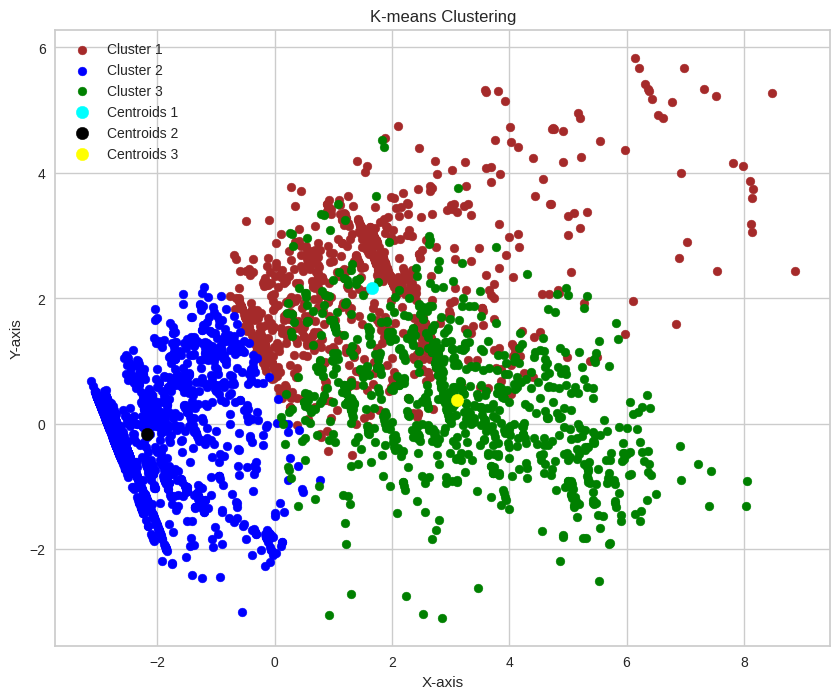

In [ ]:
# Ubah data frame menjadi Array
data = np.array(reduced_data_normalized)

# Cek y_means (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeans, pd.Series):
    y_kmeans = y_kmeans.to_numpy()

plt.figure(figsize=(10, 8))

# Scatter plot poin data pada tiap cluster
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=40, c='brown', label='Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=40, c='blue', label='Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 2], s=40, c='green', label='Cluster 3')

# Plot Centroid pada masing-masing cluster
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=80, c='aqua', label='Centroids 1')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=80, c='black', label='Centroids 2')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 2], s=80, c='yellow', label='Centroids 3')

plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

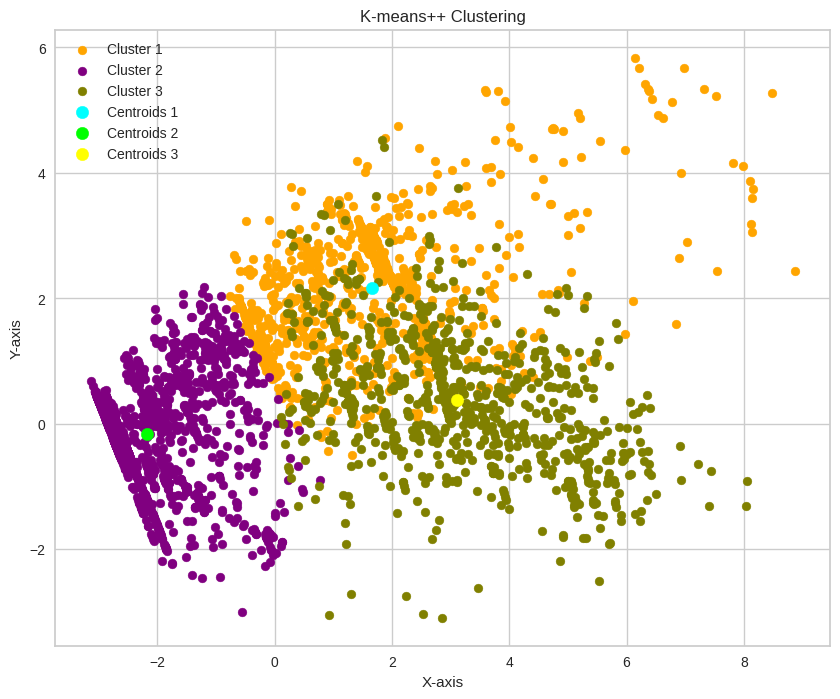

In [ ]:
# Ubah data frame menjadi Array
data = np.array(reduced_data_normalized)

# Cek y_kmeans (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeansplus, pd.Series):
    y_kmeansplus = y_kmeansplus.to_numpy()

plt.figure(figsize=(10, 8))

# Scatter plot poin data pada tiap cluster
plt.scatter(data[y_kmeansplus == 0, 0], data[y_kmeansplus == 0, 1], s=40, c='orange', label='Cluster 1')
plt.scatter(data[y_kmeansplus == 1, 0], data[y_kmeansplus == 1, 1], s=40, c='purple', label='Cluster 2')
plt.scatter(data[y_kmeansplus == 2, 0], data[y_kmeansplus == 2, 2], s=40, c='olive', label='Cluster 3')

# Plot Centroid pada masing-masing cluster
plt.scatter(kmeansplus.cluster_centers_[0, 0], kmeansplus.cluster_centers_[0, 1], s=80, c='aqua', label='Centroids 1')
plt.scatter(kmeansplus.cluster_centers_[1, 0], kmeansplus.cluster_centers_[1, 1], s=80, c='lime', label='Centroids 2')
plt.scatter(kmeansplus.cluster_centers_[2, 0], kmeansplus.cluster_centers_[2, 2], s=80, c='yellow', label='Centroids 3')

plt.title('K-means++ Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()